In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.preprocessing import scale
import keras
from tensorflow.python.keras.datasets import fashion_mnist
# from keras.callbacks import ModelCheckpoint
# from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
# from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from os import walk
from tensorflow.keras.models import load_model
import h5py
from PIL import Image
import time
import os
import functools
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
import IPython.display

In [ ]:
# # derivatives calculation example
# weight1 = tf.Variable(2.0)
# weight2 = tf.Variable(3.0)
# weight3 = tf.Variable(5.0)
# def weighted_sum(x1, x2, x3):
#   return weight1*x1 + weight2*x2 + weight3*x3
# with tf.GradientTape(persistent=True) as tape:
#   sum = weighted_sum(7.,5.,6.)
# [weight1_grad] = tape.gradient(sum, [weight1])
# [weight2_grad] = tape.gradient(sum, [weight2])
# [weight3_grad] = tape.gradient(sum, [weight3])
# print(weight1_grad.numpy()) #7.0
# print(weight2_grad.numpy()) #5.0
# print(weight3_grad.numpy()) #6.0

In [ ]:
# # make a simple model
# n_examples = 1000 
# training_steps = 1000
# display_step = 1000
# learning_rate = 0.01
# m, c = 6, -5 # gradient and y-intercept of our line

# def train_data(n, m, c):
#   x = tf.random.normal([n])
#   noise = tf.random.normal([n])
#   y = m*x + c + noise # our scatter plot
#   return x, y
# def prediction(x, weight, bias):
#   return weight*x + bias # our prediction
# def loss(x, y, weights, biases):
#   error = prediction(x, weights, biases) - y
#   squared_error = tf.square(error)
#   return tf.reduce_mean(input_tensor=squared_error)
# def grad(x, y, weights, biases):
#   with tf.GradientTape() as tape:
#     loss_ = loss(x, y, weights, biases)
#   return tape.gradient(loss_, [weights, biases])

# x, y = train_data(n_examples, m, c)
# plt.scatter(x, y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Figure 1: Training data')
# W = tf.Variable(np.random.randn())
# B = tf.Variable(np.random.randn())

# print('Initial loss: {:.3f}'.format(loss(x, y, W, B)))

# for step in range(training_steps):
#   deltaW, deltaB = grad(x, y, W, B)
#   changeW = deltaW * learning_rate
#   changeB = deltaB * learning_rate
#   W.assign_sub(changeW)
#   B.assign_sub(changeB)
#   print('Loss at step {:02d}: {:.6f}'.format(step, loss(x, y, W, B)))

# print('Final loss: {:.3f}'.format(loss(x, y, W, B)))
# print('W = {}, B = {}'.format(W.numpy(), B.numpy()))
# print('Compare with m = {:.3f}, c = {:.3f}'.format(m, c), 'of the original line')
# xs = np.linspace(-3, 4, 50)
# ys = W.numpy() * xs + B.numpy()
# plt.scatter(xs, ys)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Firgure 2: line of the best fit')


In [ ]:
## Boston housing dataset
# learning_rate = 0.01
# epochs = 10000
# display_epoch = epochs//20
# n_train = 300
# n_valid = 100
# features, prices = load_boston(True)
# n_test = len(features) - n_train - n_valid

# train_features = tf.cast(scale(features[:n_train]), dtype=tf.float32)
# train_prices = prices[:n_train]

# valid_features = tf.cast(scale(features[n_train:n_train+n_valid]), dtype=tf.float32)
# valid_prices = prices[n_train:n_train+n_valid]

# test_features = tf.cast(scale(features[n_train+n_valid:n_train+n_valid+n_test]), dtype=tf.float32)
# test_prices = prices[n_train+n_valid:n_train+n_valid+n_test]

# def prediction(x, weight, bias):
#   return tf.matmul(x, weight) + bias # our prediction
# def loss(x, y, weights, biases):
#   error = prediction(x, weights, biases) - y
#   square_error = tf.square(error)
#   return tf.sqrt(tf.reduce_mean(input_tensor=square_error))
# def gradient(x, y, weights, biases):
#   with tf.GradientTape() as tape:
#     loss_value = loss(x, y, weights, biases)
#   return tape.gradient(loss_value, [weights, biases])

# W = tf.Variable(tf.random.normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float32))
# B = tf.Variable(tf.zeros(1), dtype=tf.float32)
# print(W, B)
# print('Initial loss: {:.3f}'.format(loss(train_features, train_prices, W, B)))

# for e in range(epochs):
#   deltaW, deltaB = gradient(train_features, train_prices, W, B)
#   change_W = learning_rate * deltaW
#   change_B = learning_rate * deltaB
#   W.assign_sub(change_W)
#   B.assign_sub(change_B)
#   print('Validation loss after epoch {:02d}: {:.3f}'.format(e, loss(valid_features, valid_prices, W, B)))

# example_house = 69
# y = test_prices[example_house]
# y_pred = prediction(test_features, W.numpy(), B.numpy())[example_house]
# print('Actual price: ', y, ' in $10K')
# print('Predicted price: ', y_pred, ' in $10K')


In [ ]:
## Logistic regression
# batch_size = 128
# epochs = 20
# n_classes = 10
# learning_rate = 0.1
# width = 28
# height = 28
# fashion_labels = ["Shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# x_train = x_train.astype('float32')/ 255.
# x_test = x_test.astype('float32')/ 255.

# x_train = x_train.reshape((60000, width*height))
# x_test = x_test.reshape((10000, width*height))

# split = 50000
# (x_train, x_valid) = (x_train[:split], x_train[split:])
# (y_train, y_valid) = (y_train[:split], y_train[split:])
# y_train_ohe = tf.one_hot(y_train, depth=n_classes).numpy()
# y_valid_ohe = tf.one_hot(y_valid, depth=n_classes).numpy()
# y_test_ohe = tf.one_hot(y_test, depth=n_classes).numpy()

# # i = 5
# # print(y_train[i])
# # print(tf.one_hot(y_train[i], depth=n_classes).numpy())
# # print(y_train_ohe[i])

# _,image = plt.subplots(1, 10, figsize=(8,1))

# for i in range(10):
#   image[i].imshow(np.reshape(x_train[i], (width, height)), cmap="Greys")
#   print(fashion_labels[y_train[i]], sep='', end='')

# class LogisticRegression(tf.keras.Model):
#   def __init__(self, num_classes):
#     super(LogisticRegression, self).__init__()
#     self.dense = tf.keras.layers.Dense(num_classes)

#   def call(self, inputs, training=None, mask=None):
#     output = self.dense(inputs)
#     with tf.device('/cpu:0'): # softmax op does not exist on the gpu, so force execution on the CPU
#       output = tf.nn.softmax(output)
#     return output

# model = LogisticRegression(n_classes)
# optimizer = tf.keras.optimizers.Adam()
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# checkpointer = ModelCheckpoint(filepath='./model.weights.best.hdf5', verbose=2, save_best_only=True, save_weights_only=True)
# model.fit(x_train, y_train_ohe, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid_ohe), callbacks=[checkpointer], verbose=2)
# model.load_weights('./model.weights.best.hdf5')
# scores = model.evaluate(x_test, y_test_ohe, batch_size, verbose=2)
# print('Final test loss and accuracy: ', scores)
# y_predictions = model.predict(x_test)

# index = 42
# index_predicted = np.argmax(y_predictions[index]) 
# index_true = np.argmax(y_test_ohe[index])
# print("When prediction is ",index_predicted)
# print("ie. predicted label is", fashion_labels[index_predicted])
# print("True label is ",fashion_labels[index_true])

# print ("\n\nPredicted V (True) fashion labels, green is correct, red is wrong")
# size = 12 # i.e. 12 random numbers chosen out of x_test.shape[0] =1000, we do not replace them
# fig = plt.figure(figsize=(15,3))
# rows = 3
# cols = 4

# for i, index in enumerate(np.random.choice(x_test.shape[0], size=size, replace=True)):
#   axis = fig.add_subplot(rows, cols, i+1, xticks=[], yticks=[])
#   axis.imshow(x_test[index].reshape(width, height), cmap='Greys')
#   index_predicted = np.argmax(y_predictions[index])
#   index_true = np.argmax(y_test_ohe[index])
#   axis.set_title(("{} ({})").format(fashion_labels[index_predicted], fashion_labels[index_true]), color=("green" if index_predicted == index_true else "red"))

In [ ]:
## KNN - k-nearest neighbors
# iris = datasets.load_iris()
# x = np.array([i for i in iris.data])
# y = np.array(iris.target)
# flower_labels = ["iris setosa", "iris virginica", "iris versicolor"]
# y = np.eye(len(set(y)))[y] # one-hot encoding
# x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
# np.random.seed(42)
# split = 0.8
# train_indices = np.random.choice(len(x), round(len(x) * split), replace=False)
# test_indices = np.array(list(set(range(len(x))) - set(train_indices)))
# train_x = x[train_indices]
# test_x = x[test_indices]
# train_y = y[train_indices]
# test_y = y[test_indices]

# k = 5

# def prediction(train_x, test_x, train_y, k):
#   # d0 = tf.expand_dims(test_x, axis=1)
#   # d1 = tf.subtract(train_x, d0)
#   # d2 = tf.abs(d1)
#   # distance = tf.reduce_sum(input_tensor=d2, axis=2)
#   distances = tf.reduce_sum(tf.abs(tf.subtract(train_x, tf.expand_dims(test_x, axis =1))), axis=2)
#   _, top_k_indices = tf.nn.top_k(tf.negative(distances), k=k)
#   top_k_labels = tf.gather(train_y, top_k_indices)
#   predictions_sum = tf.reduce_sum(top_k_labels, axis=1)
#   pred = tf.argmax(predictions_sum, axis=1)
#   return pred

# i, total = 0, 0
# results = zip(prediction(train_x, test_x, train_y, k), test_y)
# print('Predicted actual')
# print('-----------------')
# for pred, actual in results:
#   print(i, flower_labels[pred.numpy()], '\t', flower_labels[np.argmax(actual)])
#   if pred.numpy() == np.argmax(actual):
#     total += 1
#   i += 1
# accuracy = round(total/len(test_x),3)*100
# print('Accuracy: ', accuracy, "%")

In [ ]:
## a simple autoencoder 
# (x_train, _), (x_test, _) = fashion_mnist.load_data()
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))

# filepath = './model.weights.best.hdf5'

# image_dim = 784 # this is the size of our input image, 784
# encoding_dim = 32 # this is the length of our encoded items.Compression of factor=784/32=24.5

# input_image = Input(shape=(image_dim, ))
# encoded_image = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_image)
# decoded_image = Dense(image_dim, activation='sigmoid')(encoded_image)
# autoencoder = Model(input_image, decoded_image)

# encoder = Model(input_image, encoded_image)

# encoded_input = Input(shape=(encoding_dim, ))
# decoder_layer = autoencoder.layers[-1]
# decoder = Model(encoded_input, decoder_layer(encoded_input))

# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# checkpointer1 = ModelCheckpoint(filepath=filepath, verbose=2, save_best_only=True)
# checkpointer2 = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=2, verbose=2, mode='auto')

# epochs = 50
# autoencoder.fit(x_train, x_train, epochs=epochs, batch_size=256, verbose=2, callbacks=[checkpointer1], shuffle=True, validation_data=(x_test, x_test))

# autoencoder.load_weights(filepath)
# encoded_images = encoder.predict(x_test) # compress
# decoded_images = decoder.predict(encoded_images) # decompress

# number_of_items = 12
# plt.figure(figsize=(20,4))
# for i in range(number_of_items):
#   # display items before compression
#   graph = plt.subplot(2, number_of_items, i+1)
#   plt.imshow(x_test[i].reshape(28,28))
#   plt.gray()
#   graph.get_xaxis().set_visible(False)
#   graph.get_yaxis().set_visible(False)

#   # display items after decompression
#   graph = plt.subplot(2, number_of_items, i+1+number_of_items)
#   plt.imshow(decoded_images[i].reshape(28,28))
#   plt.gray()
#   graph.get_xaxis().set_visible(False)
#   graph.get_yaxis().set_visible(False)
# plt.show()

4423680/4422102 [==============================] - 0s 0us/step


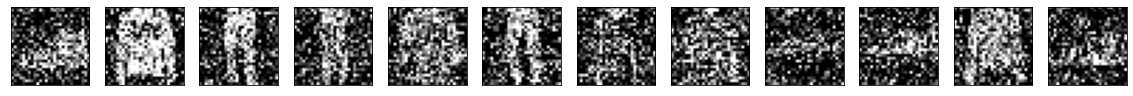

Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 0.3341
Epoch 00001: val_loss improved from inf to 0.31018, saving model to ./model1.weights.best.hdf5
469/469 [==============================] - 152s 325ms/step - loss: 0.3341 - val_loss: 0.3102
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 0.3053
Epoch 00002: val_loss improved from 0.31018 to 0.30482, saving model to ./model1.weights.best.hdf5
469/469 [==============================] - 151s 321ms/step - loss: 0.3053 - val_loss: 0.3048
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.3014
Epoch 00003: val_loss improved from 0.30482 to 0.30224, saving model to ./model1.weights.best.hdf5
469/469 [==============================] - 152s 324ms/step - loss: 0.3014 - val_loss: 0.3022
Epoch 4/100
469/469 [==============================] - ETA: 0s - loss: 0.2991
Epoch 00004: val_loss improved from 0.30224 to 0.30002, saving model to ./model1.weights.best.hdf5
469/469 [========

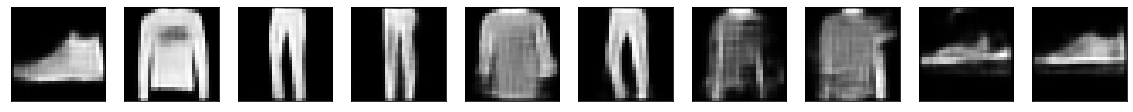

In [ ]:
## denoising image
# (train_x, _), (test_x, _) = fashion_mnist.load_data()
# train_x = train_x.astype('float32') / 255.
# test_x = test_x.astype('float32') / 255.
# train_x = np.reshape(train_x, (len(train_x), 28, 28, 1))
# test_x = np.reshape(test_x, (len(test_x), 28, 28, 1))

# noise = 0.5
# train_x_noisy = train_x + noise*np.random.normal(loc=0.0, scale=1.0, size=train_x.shape)
# test_x_noisy = test_x + noise*np.random.normal(loc=0.0, scale=1.0, size=test_x.shape)
# train_x_noisy = np.clip(train_x_noisy, 0., 1.)
# test_x_noisy = np.clip(test_x_noisy, 0., 1.)

# number_of_items = 12
# plt.figure(figsize=(20,2))
# for i in range(number_of_items):
#   display = plt.subplot(1, number_of_items, i+1)
#   plt.imshow(test_x_noisy[i].reshape(28,28))
#   plt.gray()
#   display.get_xaxis().set_visible(False)
#   display.get_yaxis().set_visible(False)
# plt.show()

# input_image = Input(shape=(28,28,1))
# im = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input_image)
# im = MaxPooling2D(pool_size=(2,2), padding='same')(im)
# im = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(im)
# encoded = MaxPooling2D(pool_size=(2,2), padding='same')(im)

# im = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(encoded)
# im = UpSampling2D((2,2))(im)
# im = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(im)
# im = UpSampling2D((2,2))(im)
# decoded = Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(im)

# autoencoder = Model(inputs=input_image, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# tb = TensorBoard(log_dir='./tmp/tb', write_graph=True)

# epochs = 100
# batch_size=128
# filepath = './model1.weights.best.hdf5'
# checkpointer1 = ModelCheckpoint(filepath=filepath, verbose=2, save_best_only=True)
# autoencoder.fit(train_x_noisy, train_x, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer1], shuffle=True, validation_data=(test_x_noisy,test_x))

# decoded_images = autoencoder.predict(test_x_noisy)
# number_of_items = 10
# plt.figure(figsize=(20,2))
# for item in range(number_of_items):
#   display = plt.subplot(1, number_of_items, item + 1)
#   im = decoded_images[item].reshape(28,28)
#   plt.imshow(im, cmap="gray")
#   display.get_xaxis().set_visible(False)
#   display.get_yaxis().set_visible(False)
# plt.show()



In [ ]:
!tensorboard --logdir=./tmp/tb

In [ ]:
## convolutional neural network example
# batch_size = 128
# img_rows, img_cols = 28, 28
# data_path = "data_files/"
# for (dirpath, dirnames, filenames) in walk(data_path):
#   pass

# num_images = 1000000
# num_files = len(filenames)
# images_per_category = num_images//num_files
# seed = np.random.randint(1, 10e7)
# i = 0

# for file in filenames:
#   file_path = data_path + file
#   x = np.load(file_path)
#   x = x.astype('float32')
#   x /= 255.
#   y = [i] * len(x)
#   x = x[:images_per_category]
#   y = y[:images_per_category]
#   if i == 0:
#     x_all = x
#     y_all = y
#   else:
#     x_all = np.concatenate((x, x_all), axis=0)
#     y_all = np.concatenate((y, y_all), axis=0)
#   i += 1
 
# x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)
# x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
# x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# input_shape = (img_rows, img_cols, 1)
# y_train = tf.keras.utils.to_categorical(y_train, num_files) # one hot encoding
# y_test = tf.keras.utils.to_categorical(y_test, num_files) # one hot encoding
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(num_files, activation='softmax'))

# print('Compiling.......')
# model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

# epochs = 25
# callbacks = [tf.keras.callbacks.TensorBoard(logdir='./tb_log_dir')]
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks, verbose=1, validation_data=(x_valid, y_valid))

# score = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss: ', score[0])
# print('Test accuracy: ', score[1])

# model.save('./QDrawModel.h5') # save model
# model = load_model('./QDrawModel.h5') # load model
# model.summary() # show that we successfully reloaded the saved model

# # save data set
# with h5py.File('x_train.h5', 'w') as hf:
#   hf.create_dataset('QuickDraw', data=x_train)
# with h5py.File('y_train.h5', 'w') as hf:
#   hf.create_dataset('QuickDraw', data=y_train)
# with h5py.File('x_valid.h5', 'w') as hf:
#   hf.create_dataset('QuickDraw', data=x_valid)
# with h5py.File('y_valid.h5', 'w') as hf:
#   hf.create_dataset('QuickDraw', data=y_valid)
# with h5py.File('x_test.h5', 'w') as hf:
#   hf.create_dataset('QuickDraw', data=x_test)
# with h5py.File('y_test.h5', 'w') as hf:
#   hf.create_dataset('QuickDraw', data=y_test)
# # load data set
# hf = h5py.File('x_train.h5', 'r')
# x_train = np.array(hf['QuickDraw'][:])
# hf = h5py.File('y_train.h5', 'r')
# y_train = np.array(hf['QuickDraw'][:])
# hf = h5py.File('x_valid.h5', 'r')
# x_valid = np.array(hf['QuickDraw'][:])
# hf = h5py.File('y_valid.h5', 'r')
# y_valid = np.array(hf['QuickDraw'][:])
# hf = h5py.File('x_test.h5', 'r')
# x_test = np.array(hf['QuickDraw'][:])
# hf = h5py.File('y_test.h5', 'r')
# y_test = np.array(hf['QuickDraw'][:])


In [ ]:
# style transfer example
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False
content_path = '/content/elephant.jpg'
style_path = '/content/zebra.jpg'
channel_means = [103.939, 116.779, 123.68]

def load_image(path_to_image):
  max_dimension = 512
  image = Image.open(path_to_image)
  longest_side = max(image.size)
  scale = max_dimension / longest_side
  image = image.resize((round(image.size[0]*scale), round(image.size[1]*scale)), Image.ANTIALIAS)
  image = kp_image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  return image

def show_image(image, title=None):
  image1 = np.squeeze(image, axis=0)
  image1 = image1.astype('uint8')
  if title is not None:
    plt.title(title)
  plt.imshow(image1)

def load_and_process_image(path_to_image):
  image = load_image(path_to_image)
  image = tf.keras.applications.vgg19.preprocess_input(image)
  return image

def deprocess_image(processed_image):
  im = processed_image.copy()
  if len(im.shape) == 4:
    im = np.squeeze(im, 0)
  assert len(im.shape) == 3, ("Input to deprocess image must be an image of "
"dimension [1, height, width, channel] or [height, width, channel]")
  if len(im.shape) != 3:
    raise ValueError('Invalid input to deprocess image')
  # inverse of the preprocessing step
  im[:, :, 0] += channel_means[0]
  im[:, :, 1] += channel_means[1]
  im[:, :, 2] += channel_means[2]
  im = im[:, :, ::-1] # channel last
  im = np.clip(im, 0, 255).astype('uint8')
  return im

plt.figure(figsize=(10,10))
content_image = load_image(content_path).astype('uint8')
style_image = load_image(style_path).astype('uint8')
plt.subplot(1,2,1)
show_image(content_image, 'Content image')
plt.subplot(1,2,2)
show_image(style_image, 'Style image')
plt.show()

content_layers = ['block5_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
number_of_content_layers = len(content_layers)
number_of_style_layers = len(style_layers)


def get_model():
  vgg_model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
  vgg_model.trainable = False
  style_outputs = [vgg_model.get_layer(name).output for name in style_layers]
  content_outputs = [vgg_model.get_layer(name).output for name in content_layers]
  model_outputs = style_outputs + content_outputs
  return models.Model(vgg_model.input, model_outputs)

def rms_loss(image1, image2):
  loss = tf.reduce_mean(input_tensor=tf.square(image1 - image2))
  return loss

def content_loss(content, target):
  return rms_loss(content, target)

def gram_matrix(input_tensor):
  channels = int(input_tensor.shape[-1])
  tensor = tf.reshape(input_tensor, [-1, channels])
  number_of_chanels = tf.shape(input=tensor)[0]
  gram = tf.matmul(tensor, tensor, transpose_a=True)
  return gram / tf.cast(number_of_chanels, tf.float32)

def style_loss(style, gram_target):
  gram_style = gram_matrix(style)
  return rms_loss(gram_style, gram_target)

def get_feature_representations(model, content_path, style_path):
  content_image = load_and_process_image(content_path)
  content_outputs = model(content_image)
  content_features = [content_layer[0] for content_layer in content_outputs[number_of_style_layers:]]

  style_image = load_and_process_image(style_path)
  style_outputs = model(style_image)
  style_features = [style_layer[0] for style_layer in style_outputs[:number_of_style_layers]]

  return style_features, content_features

def compute_total_loss(model, loss_weights, init_image, gram_style_features, content_features):
  style_weight, content_weight = loss_weights
  model_outputs = model(init_image)
  content_score = 0
  content_output_features = model_outputs[number_of_style_layers:]
  weight_per_content_layer = 1.0 / float(number_of_content_layers)
  for target_content, comb_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer*content_loss(comb_content[0], target_content)
  content_score *= content_weight

  style_score = 0
  style_output_features = model_outputs[:number_of_style_layers]
  weight_per_style_layer = 1.0 / float(number_of_style_layers)
  for target_style, comb_style in zip(gram_style_features, style_output_features):
    style_score += weight_per_style_layer*style_loss(comb_style[0], target_style)
  style_score *= style_weight

  total_loss = style_score + content_score
  return total_loss, style_score, content_score

def compute_grads(config):
  with tf.GradientTape() as tape:
    all_loss = compute_total_loss(**config)
  total_loss = all_loss[0]
  return tape.gradient(total_loss, config['init_image']), all_loss

def run_style_transfer(content_path, style_path, number_of_iterations=1000, content_weight=1e3, style_weight=1e4):
  model = get_model()
  for layer in model.layers:
    layer.trainable = False
  style_features, content_features = get_feature_representations(model, content_path, style_path)
  gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
  initial_image = load_and_process_image(content_path)
  initial_image = tf.Variable(initial_image, dtype=tf.float32)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)
  best_loss, best_image = float('inf'), None
  loss_weights = (style_weight, content_weight)
  config = {
  'model': model,
  'loss_weights': loss_weights,
  'init_image': initial_image,
  'gram_style_features': gram_style_features,
  'content_features': content_features
  }
  number_rows = 2
  number_cols = 5
  display_interval = number_of_iterations / (number_rows*number_cols)
  norm_means = np.array(channel_means)
  minimum_vals = -norm_means
  maximum_vals = 255 - norm_means
  images = []
  for i in range(number_of_iterations):
    grads, all_loss = compute_grads(config)
    loss, style_score, content_score = all_loss
    optimizer.apply_gradients([(grads, initial_image)])
    clipped_image = tf.clip_by_value(initial_image, minimum_vals, maximum_vals)
    initial_image.assign(clipped_image)
    if loss < best_loss:
      best_loss = loss
      best_image = deprocess_image(initial_image.numpy())
    if i % display_interval == 0:
      # plot_image = initial_image.numpy()
      # plot_image = deprocess_image(plot_image)
      # images.append(plot_image)
      # IPython.display.clear_output(wait=True)
      # IPython.display.display_png(Image.fromarray(plot_image))
      print('Iteration: {}'.format(i))
      print('Total loss: {:.4e}, style loss: {:.4e}, content loss: {:.4e}'.format(loss, style_score, content_score))
    # IPython.display.clear_output(wait=True)
    # plt.figure(figsize=(14,4))
    # for i,image in enumerate(images):
    #   plt.subplot(number_rows, number_cols, i+1)
    #   plt.imshow(image)
    #   plt.xticks([])
    #   plt.yticks([])
  return best_image, best_loss

best_image, best_loss = run_style_transfer(content_path, style_path, number_of_iterations=5000)
Image.fromarray(best_image)

def show_results(best_image, content_path, style_path, show_large_final=True):
  plt.figure(figsize=(10,5))
  content = load_image(content_path)
  style = load_image(style_path)
  plt.subplot(1,2,1)
  show_image(content, 'Content image')
  plt.subplot(1,2,2)
  show_image(style, 'Style image')
  if show_large_final:
    plt.figure(figsize=(10,10))
    plt.imshow(best_image)
    plt.title('Output image')
    plt.show()

show_results(best_image, content_path, style_path)

